# Churn Prediction
Churn prediction is common use case in machine learning domain. If you are not familiar with the term, churn means "leaving the company". It is very critical for business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company.

In this project, I will use "Telco Customer Churn" data set which is available on Kaggle.

There are 20 featuures (independent variables) and 1 target (dependent) variable for 7043 customers. Target variable indicates if a customer has has left the company (i.e. churn=yes) within the last month. Since the target variable has two states (yes/no or 1/0), this is a binary classification problem.

The variables are: customerID: Customer ID gender: Gender of customer SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) Partner: Whether the customer has a partner or not (Yes, No) Dependents: Whether the customer has dependents or not (Yes, No) tenure: Number of months the customer has stayed with the company PhoneService: Whether the customer has a phone service or not (Yes, No) MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service) InternetService: Customer’s internet service provider (DSL, Fiber optic, No) OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service) OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service) DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service) TechSupport: Whether the customer has tech support or not (Yes, No, No internet service) StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service) StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service) Contract: The contract term of the customer (Month-to-month, One year, Two year) PaperlessBilling: Whether the customer has paperless billing or not (Yes, No) PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) MonthlyCharges: The amount charged to the customer monthly TotalCharges: The total amount charged to the customer Churn: Whether the customer churned or not (Yes or No)

At first glance, only customerID seems irrelevant to customer churn. Other variables may or may not have an effect on customer churn. We will figure out.

Dataset can be downloaded from kaggle: "https://www.kaggle.com/datasets/blastchar/telco-customer-churn"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\HP PC\Desktop\py-master\ML Coursera\Churn-Prediction-master\Churn-Prediction-master\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

## Exploratory Data Analysis

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Target variable has imbalanced class distribution. Negative class (Churn=No) is much less than positive class (churn=Yes). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

It is always beneficial to explore the features (independent variables) before trying to build a model. Let's first discover the features that only have two values.

In [8]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [9]:
binary_cols # categorical features with two classes

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

## Binary categorical features
Let's check the class distribution of binary features.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

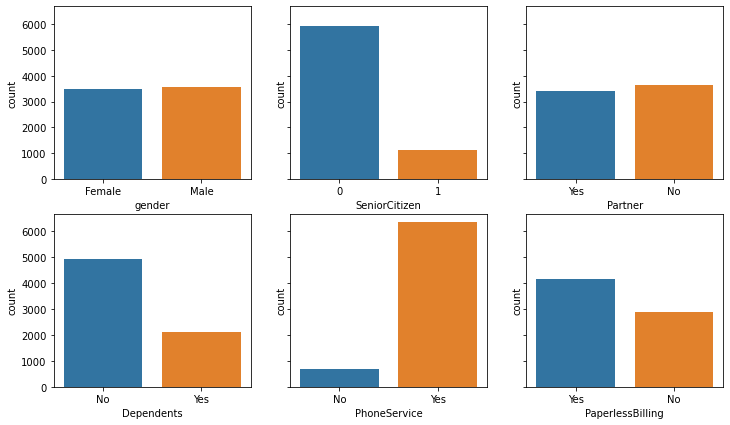

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

It is better to check how the target variable (churn) changes according to the binary features. To be able to make calculations, we need to change the values of target variable. "Yes" will be 1 and "No" will be 0.

In [11]:
Churn_numeric={'Yes':1,'No':0}
df.Churn.replace(Churn_numeric,inplace=True)

In [12]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


<AxesSubplot:xlabel='Churn', ylabel='count'>

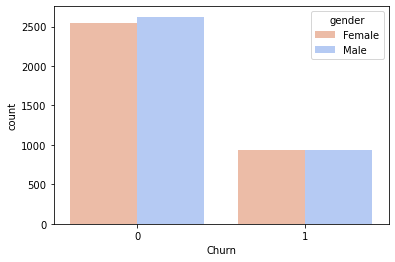

In [13]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.

In [14]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


<AxesSubplot:xlabel='Churn', ylabel='count'>

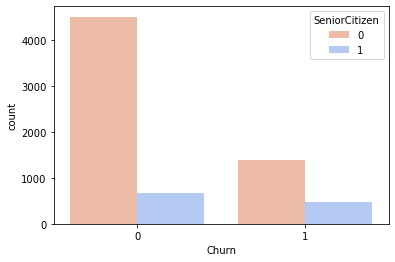

In [15]:
sns.countplot(x='Churn',data=df,hue='SeniorCitizen',palette="coolwarm_r")

In [16]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [17]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [18]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [19]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


The other binary features have an effect on the target variable. The phone service may also be skipped if you think 2% difference can be ignored. I have decided to use this feature in the model.

You can also use pandas pivot_table function to check the relationship between features and target variable

In [20]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [21]:
table = pd.pivot_table(df, values='Churn', index=['Partner'],
                    columns=['Dependents'], aggfunc=np.mean)
table

Dependents,No,Yes
Partner,,
No,0.342378,0.213296
Yes,0.254083,0.142367


### Other Categorical Features
It is time to explore other categorical features. We also have continuous features such as tenure, monthly charges and total charges which I will discuss in the next part.

There are 6 variables that come with internet service. There variables come into play if customer has internet service.

## Internet Service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

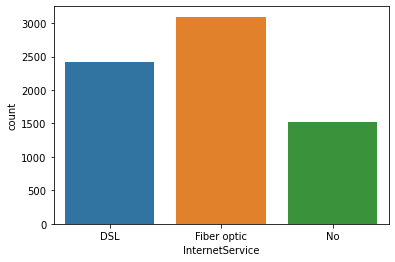

In [22]:
sns.countplot('InternetService',data=df)

In [23]:
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


Internet service variable is definitely important in predicting churn rate. As you can see, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. This company may have some problems with fiber optic connection. However, it is not a good way to make assumptions based on only one variable. Let's also check the monthly charges.

In [24]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

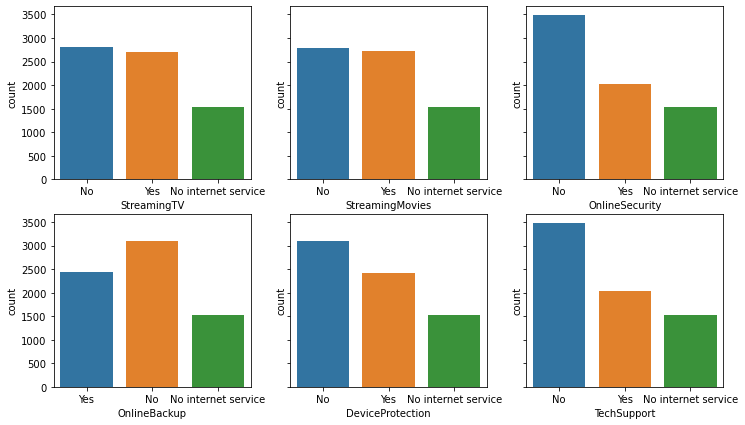

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [26]:
for column in df:
   print(f'{column}: {df[column].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [27]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

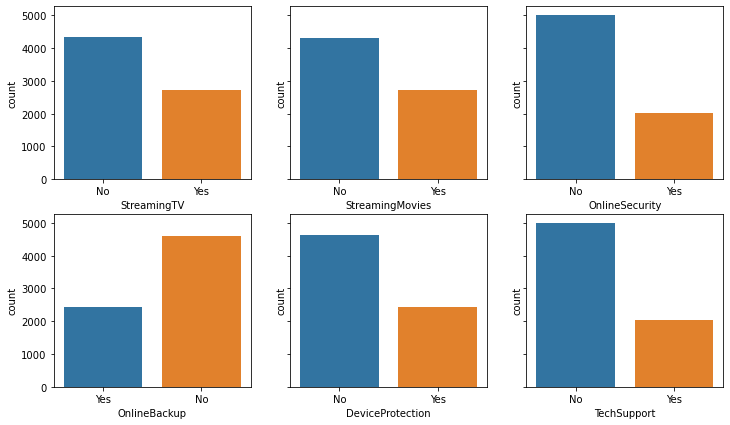

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [29]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.243312
Yes,0.300702


In [30]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()


,Churn
StreamingMovies,
No,0.243795
Yes,0.299414


In [31]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.313296
Yes,0.146112


In [32]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.291721
Yes,0.215315


In [33]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.286518
Yes,0.225021


In [34]:
df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.311862
Yes,0.151663


All internet service related features seem to have different churn rates for their classes.

In [35]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [36]:
df.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [37]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250246
Yes,0.286099


<AxesSubplot:xlabel='Contract', ylabel='count'>

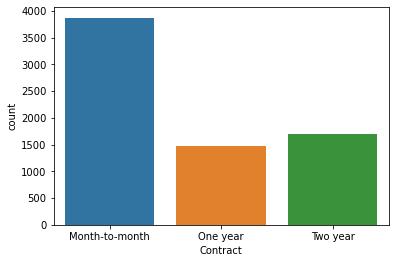

In [38]:
sns.countplot("Contract", data=df)

In [39]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

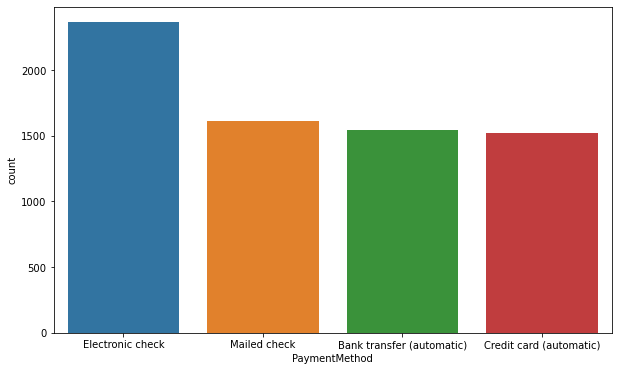

In [40]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)

In [41]:
df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types. Therefore, this segment may be further investigated if customers paying with electronic checks have any other thing in common

## Continuous Variables
The continuous features are tenure, monthly charges and total charges. The amount in total charges columns is proportional to tenure (months) multiplied by monthly charges. So it is unnecessary to include total charges in the model. Adding unnecassary features will increase the model complexity. It is better to have a simpler model when possible. Complex models tend to overfit and not generalize well to new, previously unseen observations. Since the goal of a machine learning model is to predict or explain new observations, overfitting is a crucial issue.

Let's also have a look at the distribution of continuous features.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

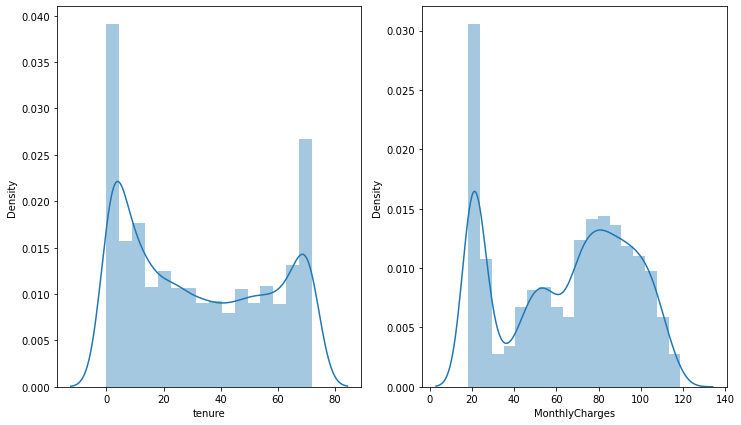

In [42]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

In [43]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


It is clear that people who have been a customer for a long time tend to stay with the company. The average tenure in months for people who left the company is 20 months less than the average for people who stay.

It seems like monthly charges also have an effect on churn rate.

Contract and tenure features may be correlated because customer with long term contract are likely to stay longer with the company. Let's figure out.

In [44]:
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


As expected, contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts. I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model: 1) Customer ID 2) Gender 3) PhoneService 4) Contract 5) TotalCharges

In [45]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [46]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


## Data Preprocessing
Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. The categorical variables in our data set are not ordinal (i.e. there is no order in them). For example, "DSL" internet service is not superior to "Fiber optic" internet service. An example for an ordinal categorical variable would be ratings from 1 to 5 or a variable with categories "bad", "average" and "good".

When we encode the categorical variables, a number will be assigned to each category. The category with higher numbers will be considered more important or effect the model more. Therefore, we need to do encode the variables in a way that each category will be represented by a column and the value in that column will be 0 or 1.

We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [48]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [49]:
sc = MinMaxScaler()
X['tenure'] = sc.fit_transform(df[['tenure']])
X['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])

In [50]:
X.shape

(7043, 19)

In [51]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [52]:
X1=X.copy()
X1.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


## Resampling
As we briefly discussed in the beginning, target variables with imbalanced class distribution is not desired for machine learning models. I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

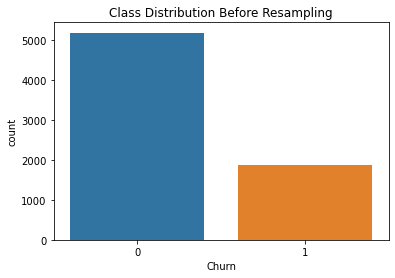

In [53]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

Separating positive class (churn=yes) and negative class (churn=no):

In [54]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

Upsampling the positive class:

In [55]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


Combining positive and negative class and checking class distribution:

Text(0.5, 1.0, 'Class Distribution After Resampling')

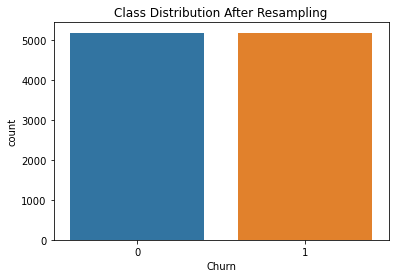

In [56]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

## Model Creation and Evaluation
We need to divide the dataset into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.

In [57]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Ridge Classifier
I have decided to use ridge classifier as a base model. Then I will try a model that I think will perform better.

In [58]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

RidgeClassifier(normalize=False)

In [59]:
pred = clf_ridge.predict(X_train)  #make predictions on training set

In [60]:
pred = clf_ridge.predict(X_train)  #make predictions on training set
accuracy_score(y_train, pred) #accuracy on training set

0.7576709350084562

In [61]:
confusion_matrix(y_train, pred)

array([[3053, 1077],
       [ 929, 3219]], dtype=int64)

Making predictions on test set and evaluating:

In [62]:
pred_test = clf_ridge.predict(X_test)

In [63]:
accuracy_score(y_test, pred_test)

0.7608695652173914

The model achieved 75% accuracy on training set and 76% accuracy on test set. The model is not overfitting because accuracies on training and test sets are pretty close. However, 75% accuracy is not very good so we will try to get a better accuracy using a different model.

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

Creating a random forest object and training it:

In [65]:
clf_forest = RandomForestClassifier(n_estimators=150, max_depth=20)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=150)

There are two parameters we need to mention here.

n_estimators: The number of trees in the forest.
max_depth: The maximum depth of the tree.
These parameters have critical roles in the accuracy of model and also preventing the model from overfitting. In general, if we use deep trees (max_depth is very high), the model may end up overfitting.

Making predictions on training set and evaluating:

In [66]:
pred = clf_forest.predict(X_train)

In [67]:
accuracy_score(y_train, pred)

0.9958927277120078

Making predictions on test set and evaluating:

In [68]:
pred_test = clf_forest.predict(X_test)

In [69]:
accuracy_score(y_test, pred_test)

0.9048309178743962

The accuracy on training set is 5% higher than the accuracy on test set which indicates a slight overfitting. We can decrease the depth of a tree in the forest because as trees get deeper, they tend to be more specific which results in not generalizing well. However, reducing tree depth may also decrease the accuracy. So we need to be careful when optimizing the parameters. We can also increase the number of trees in the forest which will help the model to be more generalized and thus reduce overfitting. Parameter tuning is a very critical part in almost every project.

Another way is to do cross-validation which allows to use every sample in training and test set.

## Improving the Model

GridSearchCV provides an easy way for parameter tuning. We can do cross-validation and try different parameters using GridSearchCV.

In [70]:
from sklearn.model_selection import GridSearchCV

Creating a GridSearchCV object:

In [71]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

cv = 5 means having a 5-fold cross validation. So dataset is divided into 5 subset. At each iteration, 4 subsets are used in training and the other subset is used as test set. When 5 iteration completed, the model used all samples as both training and test samples.

n_jobs parameter is used to select how many processors to use. -1 means using all processors.

In [72]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

Let’s check the best parameters and overall accuracy:

In [73]:
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_

0.9004645059458349